In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


c:\Users\karan\anaconda3\envs\agent\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("master_dataset.csv")  
target_col = "pv_mv_current"
final_features = [
    "mv_pct_from_peak",
    "current_club_name_te",
    "team_club_name_te",
    "team_competition_id_te",
    "mv_gap_from_peak",
    "team_country_name_te",
    "team_competitions_count",
    "team_team_seasons_count",
    "team_latest_season",
    "pv_mv_count",
    "age",
    "tm_joint_goal_participation",
    "tm_unique_teammates",
    "tr_last_transfer_fee",
    "tr_total_transfer_fees",
    "tr_first_transfer_date_te",
    "tr_years_since_last_transfer",
    "perf_assists_rolling_5",
    "inj_total_injuries",
    "tr_last_transfer_date_te",
    "perf_assists",
    "perf_assists_rolling_10",
    "inj_mean_days_out",
    "inj_seasons_with_injury"
]




In [3]:
X = df[final_features]
y = df[target_col]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
with open("lightgbm_best_model.pkl", "rb") as f:
    best_model = pickle.load(f)



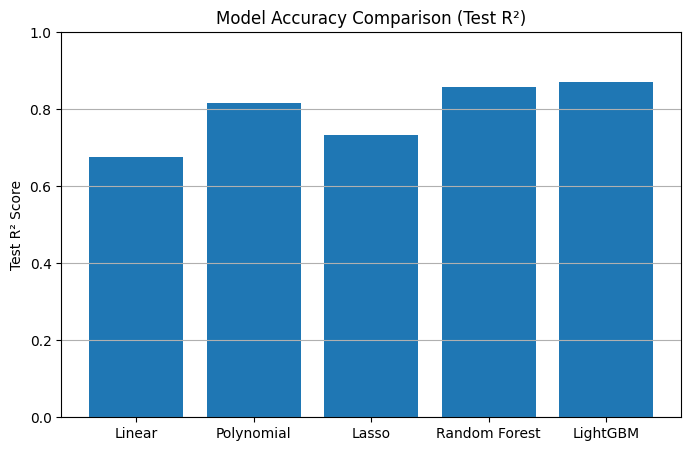

In [14]:
import matplotlib.pyplot as plt

models = [
    "Linear",
    "Polynomial",
    "Lasso",
    "Random Forest",
    "LightGBM"
]

test_r2 = [
    0.677,
    0.817,
    0.733,
    0.859,
    0.870
]

plt.figure(figsize=(8, 5))
plt.bar(models, test_r2)
plt.ylim(0, 1)
plt.ylabel("Test R² Score")
plt.title("Model Accuracy Comparison (Test R²)")
plt.grid(axis="y")
plt.show()


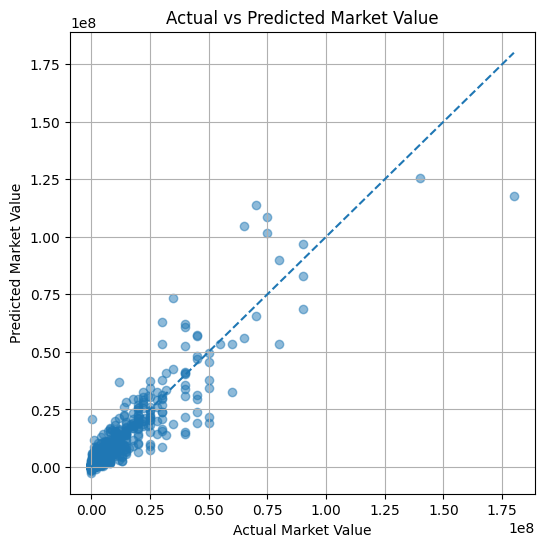

In [6]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value")
plt.grid(True)
plt.show()


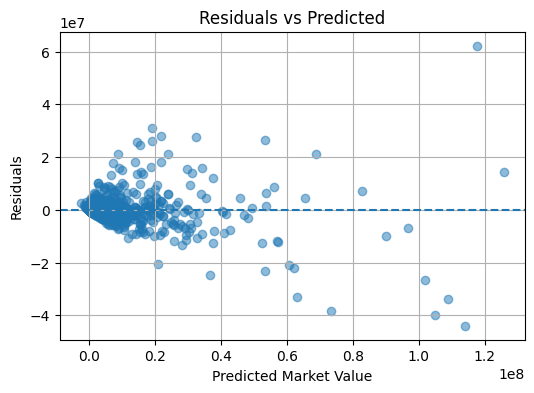

In [7]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Market Value")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


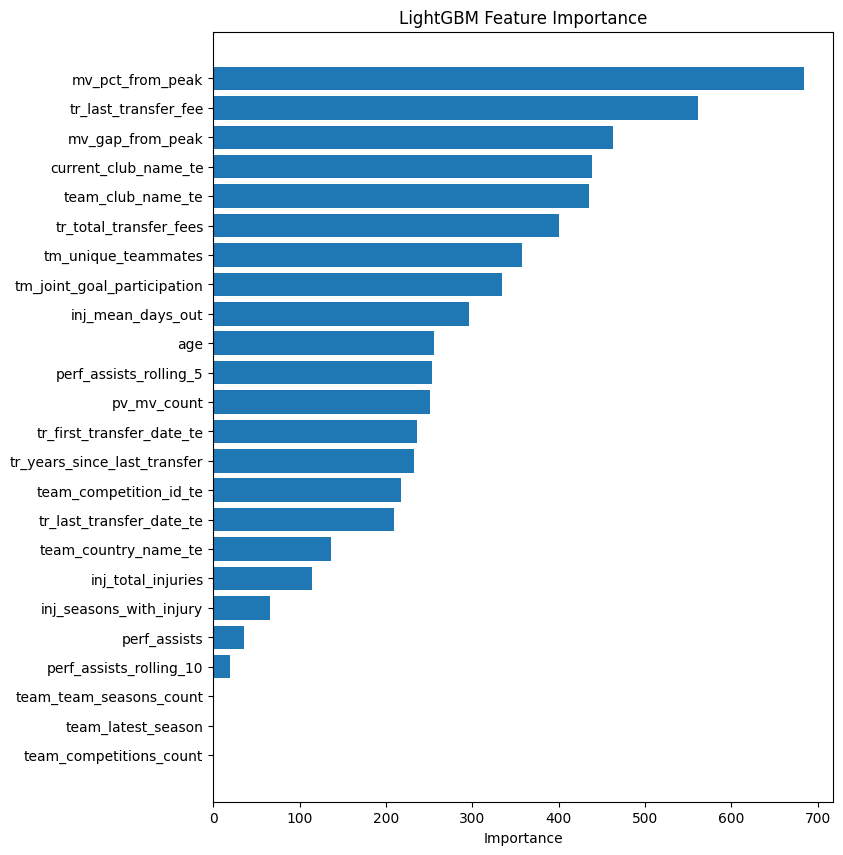

In [8]:
importance_df = pd.DataFrame({
    "Feature": final_features,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(8, 10))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance")
plt.show()


In [9]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)


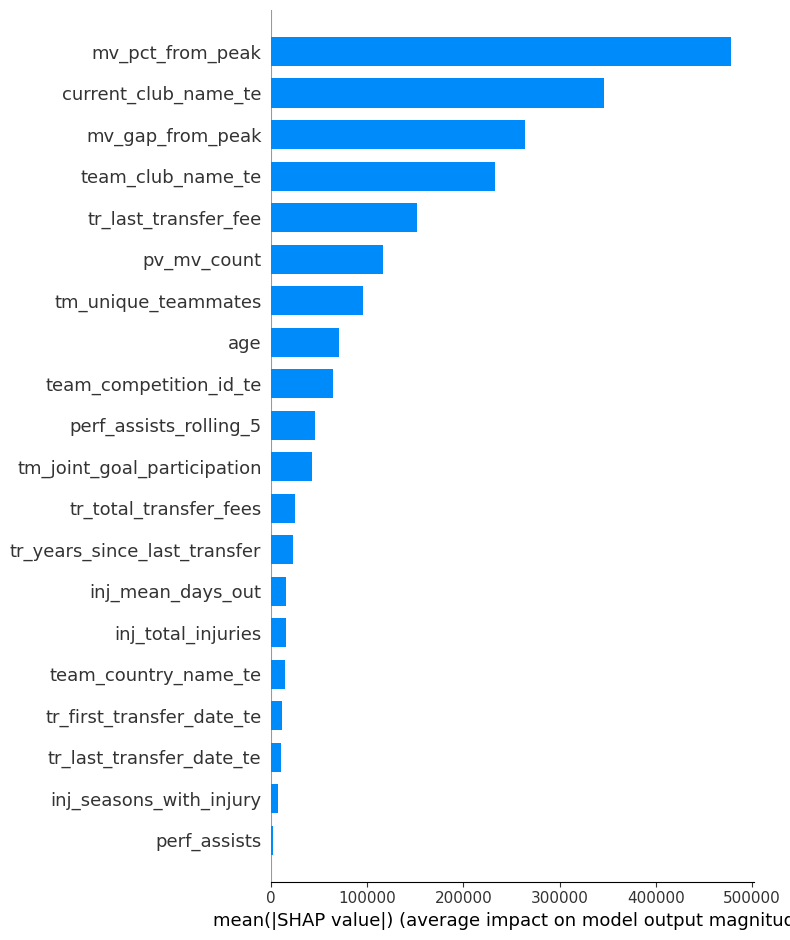

In [10]:
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=final_features,
    plot_type="bar"
)


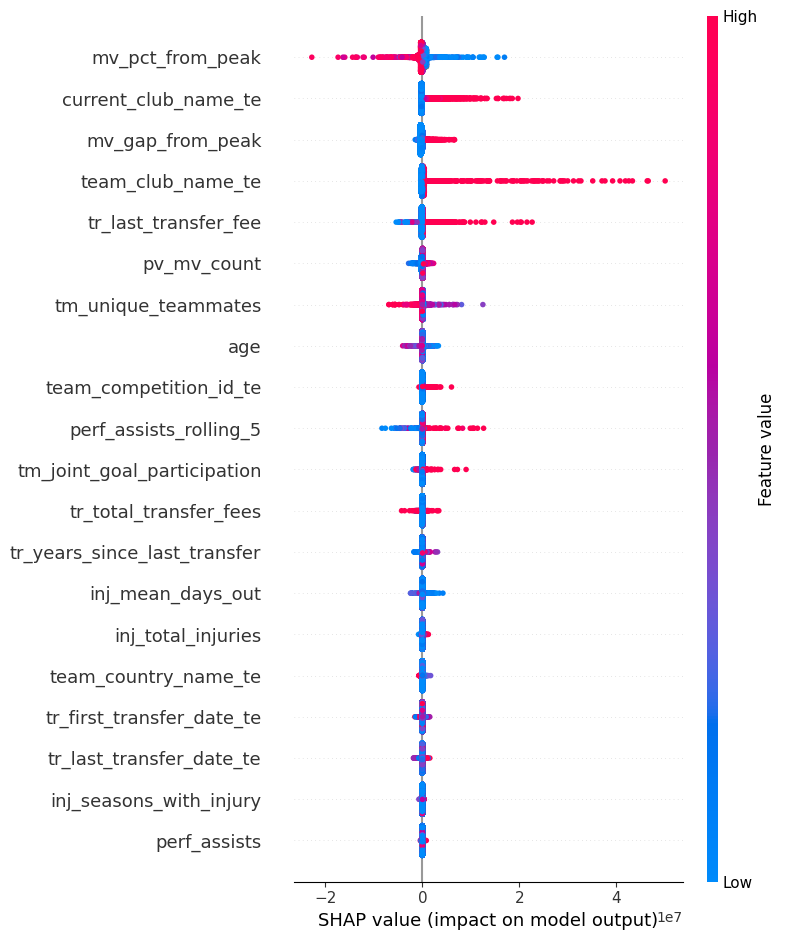

In [11]:
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=final_features
)


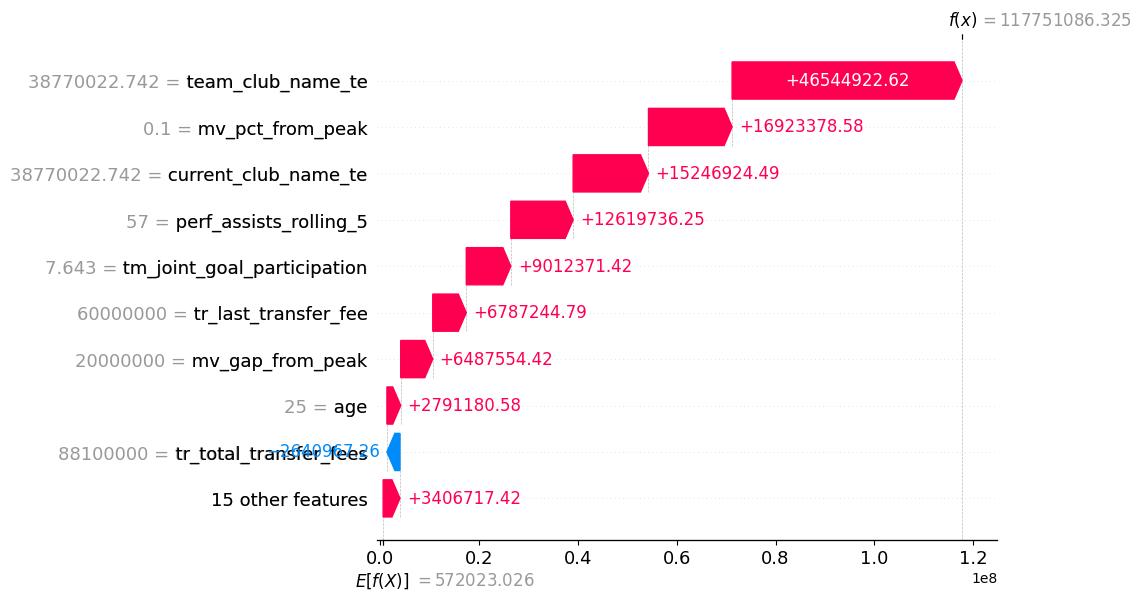

In [12]:
idx = np.argmax(y_test.values)

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[idx],
        base_values=explainer.expected_value,
        data=X_test.iloc[idx],
        feature_names=final_features
    )
)


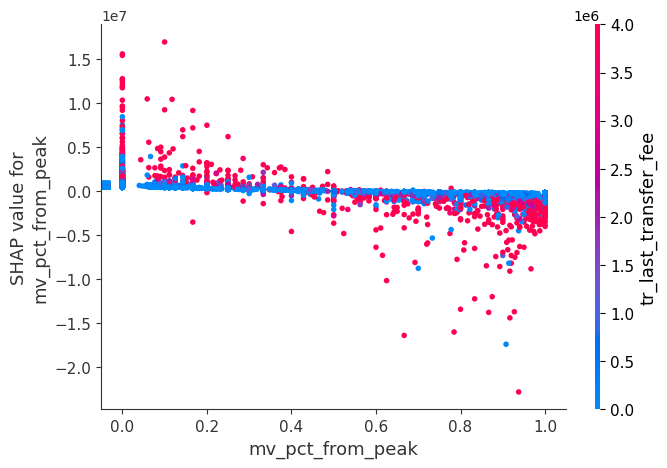

In [13]:
shap.dependence_plot(
    "mv_pct_from_peak",
    shap_values,
    X_test,
    feature_names=final_features
)


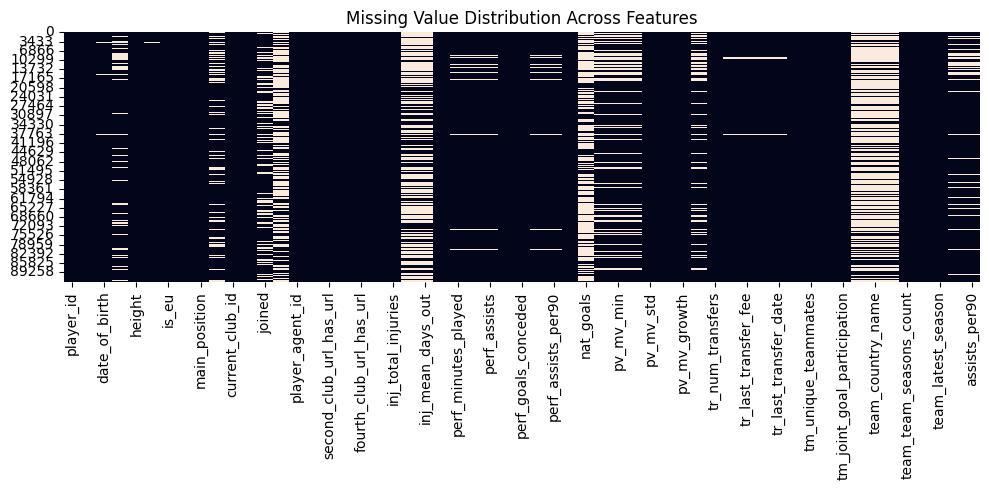

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("merged_ml.csv.gz")

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Distribution Across Features")
plt.tight_layout()
plt.show()


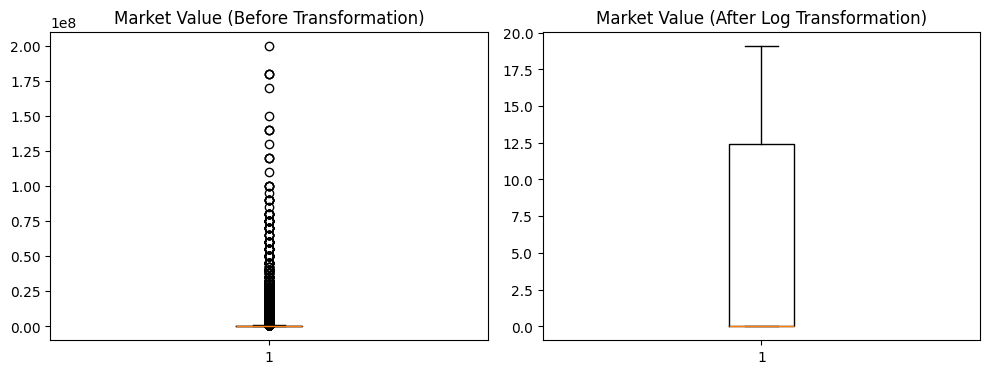

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("merged_ml.csv.gz")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot(df["pv_mv_current"].dropna())
plt.title("Market Value (Before Transformation)")

plt.subplot(1,2,2)
plt.boxplot(np.log1p(df["pv_mv_current"].dropna()))
plt.title("Market Value (After Log Transformation)")

plt.tight_layout()
plt.show()
